In [5]:
#Import pandas and numpy libraries

import pandas as pd

import numpy as np

In [4]:
#Reading the raw data in the CSV file into a dataframe, df

df = pd.read_csv("exams")

#Show the first five rows
df.head()


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [32]:
#Importing matplotlib for plotting and Seaborn for visualization 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#Find null columns and rename null columns

df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [25]:
df.rename(columns={'Unnamed:0':'Student_ID'},inplace=True)


In [22]:
# Add total score and average score columns for the three subjects

df['TotalScore'] = (df['MathScore']+df['ReadingScore']+df['WritingScore'])
df['AvgScore'] = ((df['TotalScore'])/3).round(0)

In [23]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore,AvgScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,216,72.0
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,247,82.0
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,271,90.0
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,143,48.0
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,229,76.0


In [26]:
#DESCRIPTIVES

df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,TotalScore,AvgScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622,204.354558,68.116739
std,288.747894,1.458242,15.361616,14.758952,15.443525,43.362980,14.456619
min,0.000000,0.000000,0.000000,10.000000,4.000000,27.000000,9.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000,175.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000,205.000000,68.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000,236.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000,300.000000,100.000000


In [135]:
#Grouping the four scores(math,reading,writing and average) based on select column attributes


grade_columns = ['MathScore','ReadingScore','WritingScore','AvgScore']
group_columns = ['Gender','EthnicGroup','LunchType','ParentEduc','ParentMaritalStatus','WklyStudyHours']
for x in group_columns:
    grouped_scores = df.groupby(x)[grade_columns].mean()
    display(grouped_scores.sort_values('AvgScore',ascending=False).style.background_gradient())

,MathScore,ReadingScore,WritingScore,AvgScore
Gender,,,,
female,64.080654,72.853216,72.856457,69.928683
male,69.069856,65.854571,63.920418,66.280147


,MathScore,ReadingScore,WritingScore,AvgScore
EthnicGroup,,,,
group E,75.298936,74.251423,72.677060,74.074487
group D,67.666400,70.382247,70.890844,69.640944
group C,64.695723,68.438233,66.999240,66.712983
group B,63.490216,67.320460,65.895125,65.567285
group A,62.991888,66.787742,65.251915,65.000000


,MathScore,ReadingScore,WritingScore,AvgScore
LunchType,,,,
standard,70.709370,72.175634,71.529716,71.469982
free/reduced,58.862332,64.189735,62.650522,61.899683


,MathScore,ReadingScore,WritingScore,AvgScore
ParentEduc,,,,
master's degree,72.336134,75.832921,76.356896,74.839348
bachelor's degree,70.466627,73.062020,73.331069,72.281748
associate's degree,68.365586,71.124324,70.299099,69.931712
some college,66.390472,69.179708,68.501432,68.020202
high school,64.435731,67.213997,65.421136,65.692808
some high school,62.584013,65.510785,63.632409,63.907196


,MathScore,ReadingScore,WritingScore,AvgScore
ParentMaritalStatus,,,,
widowed,67.368866,69.651438,68.563452,68.526227
divorced,66.691197,69.655011,68.799146,68.380972
married,66.657326,69.389575,68.420981,68.155248
single,66.165704,69.157250,68.174440,67.830210


,MathScore,ReadingScore,WritingScore,AvgScore
WklyStudyHours,,,,
> 10,68.696655,70.365436,69.777778,69.613995
5 - 10,66.870491,69.660532,68.636280,68.387111
< 5,64.580359,68.176135,67.090192,66.611920


In [28]:
#Getting counts for each column item

cou_col = df.select_dtypes('object').columns
for i, col in enumerate(cou_col):
    print(df[col].value_counts())
    print('\n')

female    15424
male      15217
Name: Gender, dtype: int64


group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: EthnicGroup, dtype: int64


some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64


standard        19905
free/reduced    10736
Name: LunchType, dtype: int64


none         18856
completed     9955
Name: TestPrep, dtype: int64


married     16844
single       7097
divorced     4919
widowed       591
Name: ParentMaritalStatus, dtype: int64


sometimes    15213
regularly    10793
never         4004
Name: PracticeSport, dtype: int64


yes    19082
no     10655
Name: IsFirstChild, dtype: int64


school_bus    16145
private       11362
Name: TransportMeans, dtype: int64


5 - 10    16246
< 5        8238
> 10       5202
Name: WklyStudyHours, dtype: int64




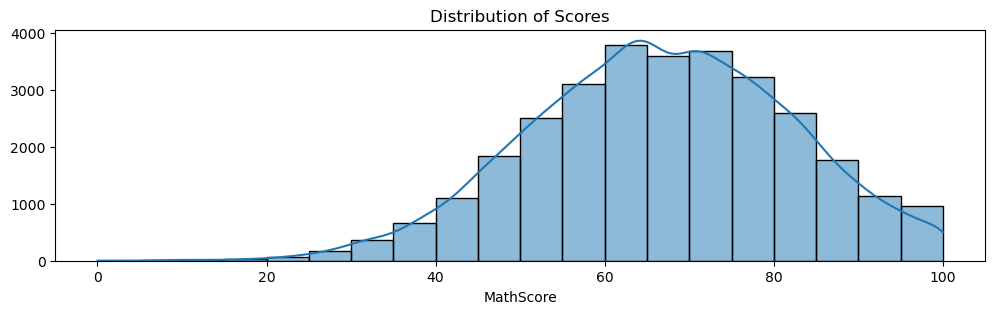

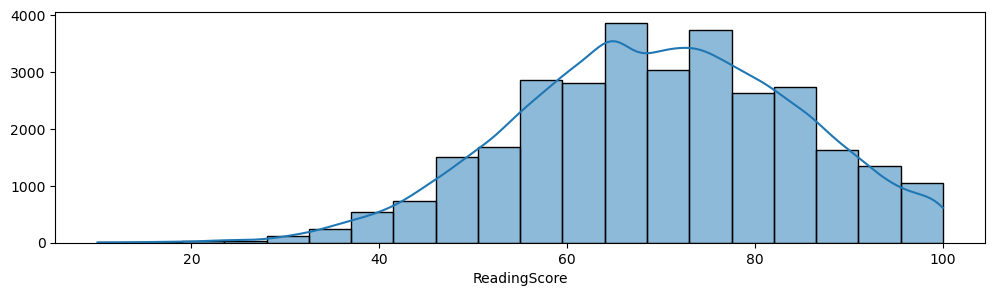

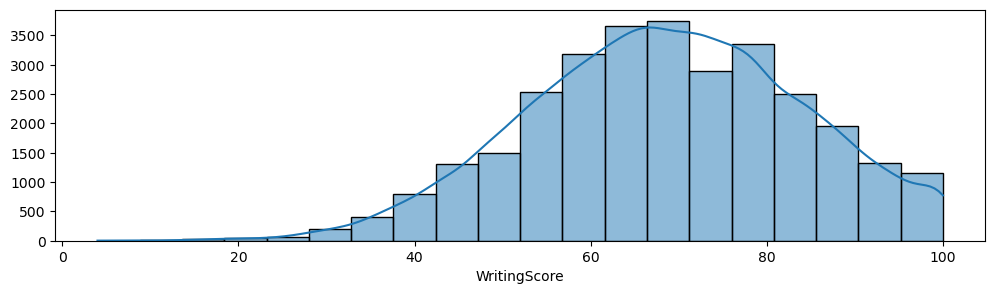

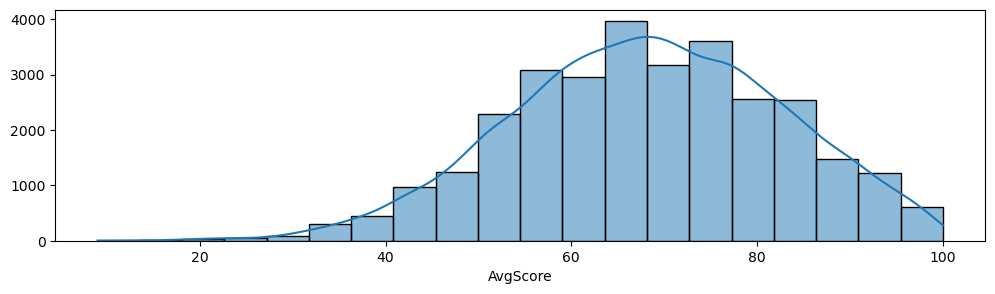

In [57]:
#Checking distribution of scores

    #first drop nulls for seaborn to plot histogram without errors

cleaned_data = df.dropna()


fig1 = plt.figure(figsize=(12,3))
sns.histplot(data = df, x='MathScore', bins = 20, kde = True)
plt.title('Distribution of Scores')
plt.xlabel('MathScore')
plt.ylabel(None)

fig2 = plt.figure(figsize=(12,3))
sns.histplot(data = df, x='ReadingScore', bins = 20, kde = True)
plt.xlabel('ReadingScore')
plt.ylabel(None)

fig3 = plt.figure(figsize=(12,3))
sns.histplot(data = df, x='WritingScore', bins = 20, kde = True)
plt.xlabel('WritingScore')
plt.ylabel(None)

fig4 = plt.figure(figsize=(12,3))
sns.histplot(data = df, x='AvgScore', bins = 20, kde = True)
plt.xlabel('AvgScore')
plt.ylabel(None)

plt.show()

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

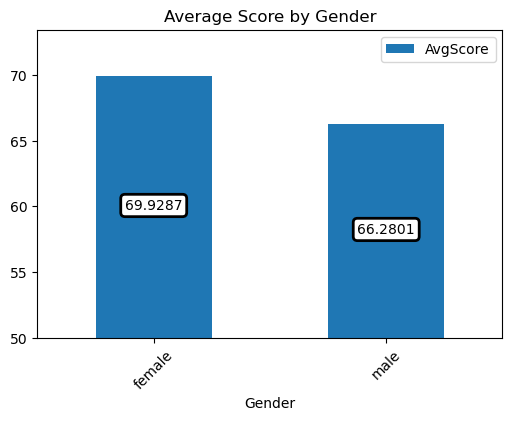

In [126]:
#DATA ANALYSIS: 


#Average Score by Gender



gender=pd.pivot_table(df,index='Gender',values=['AvgScore'])
genderplt=gender.plot(kind='bar',y=['AvgScore'],linewidth=2,figsize=(6,4),title='Average Score by Gender')
genderplt.bar_label(genderplt.containers[0], label_type='center',padding=1,bbox={"boxstyle": "round", 
    "facecolor": "white", "linewidth" : 2})
plt.ylim(50,)
plt.xticks(rotation=45)

In [107]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore,AvgScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,216,72.0
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,271,90.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,143,48.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,229,76.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'group A'),
  Text(1, 0, 'group B'),
  Text(2, 0, 'group C'),
  Text(3, 0, 'group D'),
  Text(4, 0, 'group E')])

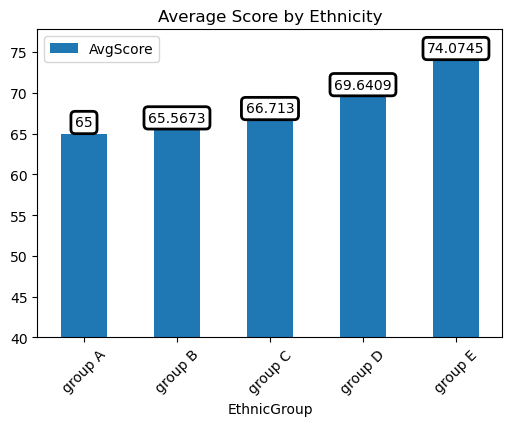

In [125]:
#Average Score by Ethnicity

ethnic=pd.pivot_table(df,index='EthnicGroup',values=['AvgScore'])
ethnicplt=ethnic.plot(kind='bar',y=['AvgScore'],linewidth=2,figsize=(6,4),title='Average Score by Ethnicity')
ethnicplt.bar_label(ethnicplt.containers[0], label_type='edge',padding=3,bbox={"boxstyle": "round", 
    "facecolor": "white", "linewidth" : 2})
plt.ylim(40,)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced'),
  Text(1, 0, 'married'),
  Text(2, 0, 'single'),
  Text(3, 0, 'widowed')])

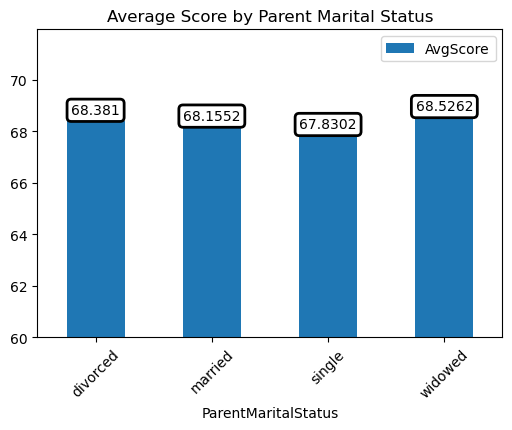

In [128]:
#Average Score by Parent's Marital Status

parentms=pd.pivot_table(df,index='ParentMaritalStatus',values=['AvgScore'])
parentmsplt=parentms.plot(kind='bar',y=['AvgScore'],linewidth=2,figsize=(6,4),title='Average Score by Parent Marital Status')
parentmsplt.bar_label(parentmsplt.containers[0], label_type='edge',padding=3,bbox={"boxstyle": "round", 
    "facecolor": "white", "linewidth" : 2})
plt.ylim(60,)
plt.xticks(rotation=45)

In [113]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore,AvgScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,216,72.0
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,271,90.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,143,48.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,229,76.0


(array([0, 1]), [Text(0, 0, 'free/reduced'), Text(1, 0, 'standard')])

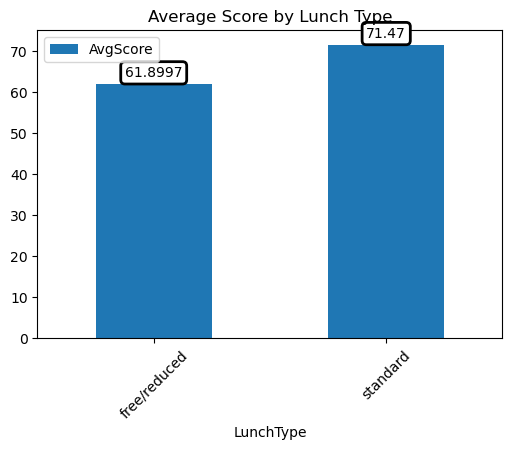

In [114]:
#Average Score by Lunch Type

lunchtype=pd.pivot_table(df,index='LunchType',values=['AvgScore'])
lunchtypeplt=lunchtype.plot(kind='bar',y=['AvgScore'],linewidth=2,figsize=(6,4),title='Average Score by Lunch Type')
lunchtypeplt.bar_label(lunchtypeplt.containers[0], label_type='edge',padding=3,bbox={"boxstyle": "round", 
    "facecolor": "white", "linewidth" : 2})
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, '5 - 10'), Text(1, 0, '< 5'), Text(2, 0, '> 10')])

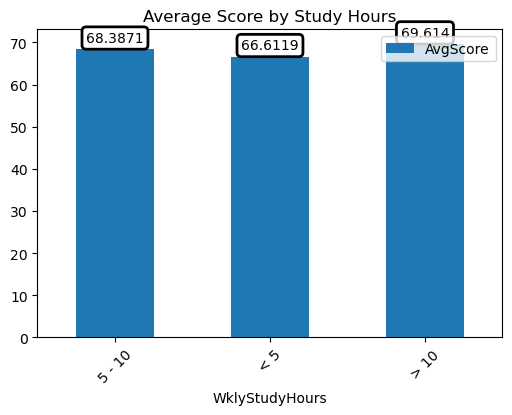

In [115]:
#Average Score by Study Hours

studyhours=pd.pivot_table(df,index='WklyStudyHours',values=['AvgScore'])
studyhoursplt=studyhours.plot(kind='bar',y=['AvgScore'],linewidth=2,figsize=(6,4),title='Average Score by Study Hours')
studyhoursplt.bar_label(studyhoursplt.containers[0], label_type='edge',padding=3,bbox={"boxstyle": "round", 
    "facecolor": "white", "linewidth" : 2})
plt.xticks(rotation=45)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

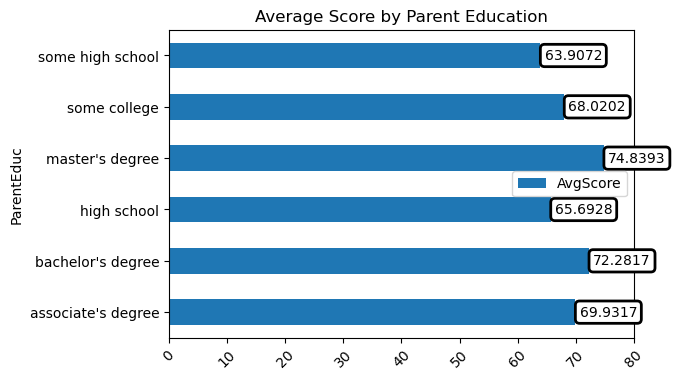

In [120]:
#Average Score by Parent's Education

parentseduc=pd.pivot_table(df,index='ParentEduc',values=['AvgScore'])
parentseducplt=parentseduc.plot(kind='barh',y=['AvgScore'],linewidth=2,figsize=(6,4),title='Average Score by Parent Education')
parentseducplt.bar_label(parentseducplt.containers[0], label_type='edge',padding=3,bbox={"boxstyle": "round", 
    "facecolor": "white", "linewidth" : 2})
plt.xlim([0,80])
plt.xticks(rotation=45)

In [131]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore,AvgScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,216,72.0
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,271,90.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,143,48.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,229,76.0
